## Estadística Aplicada
### Karen Lorelei Cerda Roiz 1945088
#### 3 mayo 2023

## Pronóstico series de tiempo (ARIMA)

In [1]:
# las de siempre
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# las de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

# modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [12]:
# la base de datos
igae= pd.read_excel('IGAE.xlsx')
# esta serie es de frecuencia mensual

In [13]:
igae

,Periodos,IGAE
0,2000/01,79.325572
1,2000/02,78.799329
2,2000/03,78.714380
3,2000/04,79.247601
4,2000/05,79.795178
...,...,...
273,2022/10,113.237145
274,2022/11,112.815614
275,2022/12,113.276229
276,2023/01,113.982481


Cuando trabajemos con series de tiempo siempre hay que definir/especificar la variable de tiempo y convertirla en el index

In [14]:
# convertir en variable de tiempo a Periodos
igae['Periodos'] = pd.to_datetime(igae['Periodos'], format='%Y/%m')

In [15]:
# debemos convertir en el index al tiempo
igae = igae.set_index('Periodos')
# asignar la frecuencia
igae = igae.asfreq('MS')

In [16]:
igae.head(2)

,IGAE
Periodos,
2000-01-01,79.325572
2000-02-01,78.799329


In [18]:
igae.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', name='Periodos', length=278, freq='MS')

Una vez definida la variable de tiempo, convertida en index y asignada la frecuencia podemos usar el análisis de series de tiempo en Python

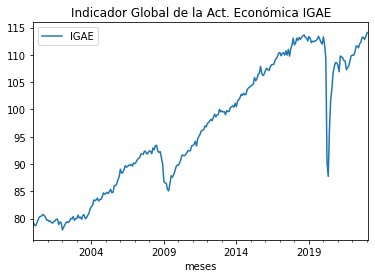

In [20]:
# En una serie de tiempo lo primero es graficar
igae.plot()
plt.title('Indicador Global de la Act. Económica IGAE')
plt.xlabel('meses')
plt.show()

El IGAE se parece a una caminata aleatoria con deriva, tiene tendencia positiva, también observamos los ciclos (crisis)

1. Probar si la serie es estacionaria

In [22]:
# Prueba de Raiz Unitaria
## Prueba de Dickey-fuller Aumentada
## H0: Serie no estacionaria
ADF_test1 = adfuller(igae['IGAE'])

## signifiancia 5%
alpha = 0.05

# ADF_test1[1] = pvalue
if ADF_test1[1] < alpha:
    print('Rechaza H0, Serie estacionaria')
else:
    print('No rechazamos H0, Serie No estacionaria')

No rechazamos H0, Serie No estacionaria


que para convertir una serie en estacionaria tenemos que aplicar primeras doferencias

$\Delta Y_t = Y_t - Y_(t-1) $

In [23]:
# Calcular las primeras diferencias IGAE
igae['igae_diferenciado'] = igae['IGAE'].diff()

In [24]:
igae.head(5)

,IGAE,igae_diferenciado
Periodos,,
2000-01-01,79.325572,NaN
2000-02-01,78.799329,-0.526243
2000-03-01,78.714380,-0.084950
2000-04-01,79.247601,0.533221
2000-05-01,79.795178,0.547577


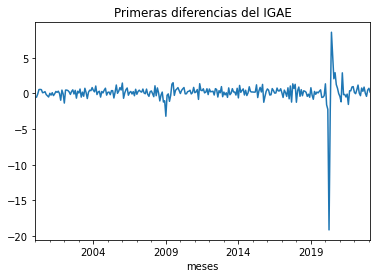

In [25]:
# graficar el IGAE diferenciado
igae['igae_diferenciado'].plot()
plt.xlabel('meses')
plt.title('Primeras diferencias del IGAE')
plt.show()

In [29]:
# vamos a corroborar que las primeras diferencias del IGAE sean un proceso estacionario
ADF_test2 = adfuller(igae['igae_diferenciado'].dropna())

if ADF_test2[1] < alpha:
    print('Se Rechaza H0, serie estacionaria')
else:
    print('No Rechaza H0, serie no estacionaria')

Se Rechaza H0, serie estacionaria


Si la serie es estacionaria, lo siguiente es identificar qué tipo de proceso estacionario es, para eso nos auxiliamos de ACF y PACF

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


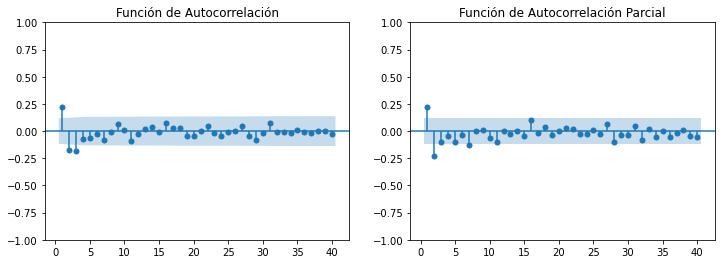

In [30]:
ig, ax = plt.subplots(1,2,figsize=(12,4))
 
plot_acf(igae['igae_diferenciado'].dropna(), zero=False, lags=40, ax=ax[0],title="Función de Autocorrelación")
ax[0].set_ylim(-1,1)
plot_pacf(igae['igae_diferenciado'].dropna(), zero=False, lags=40, ax=ax[1], title="Función de Autocorrelación Parcial")
ax[1].set_ylim(-1,1)
plt.show()

ACF te da el grado de MA(q)
PACF te da el grado de AR(p)

Vamos a suponer que estamos ante un AR(2)

ARIMA (p, I, q)

p es el orden del AR

q es el orden MA

I es el orden de integración de la serie de tiempo (cuantas se diferencio la serie para hacerla estacionaria)

ARIMA (p, I=0, q) = ARIMA (p,q)

ARIMA (p=0, 1) = MA(1)

ARIMA (p, q=0) = AR(p)

In [31]:
# vamos a suponer que el IGAE diferenciado es AR(2)
# AR(2) = ARIMA(2,0) = ARIMA(2, I=0, 0)
modelo = ARIMA(igae['igae_diferenciado'].dropna(), order=(2,0,0))
resultado = modelo.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:      igae_diferenciado   No. Observations:                  277
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -484.350
Date:                Wed, 03 May 2023   AIC                            976.699
Time:                        16:58:15   BIC                            991.195
Sample:                    02-01-2000   HQIC                           982.516
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1253      0.156      0.802      0.423      -0.181       0.432
ar.L1          0.2741      0.042      6.485      0.000       0.191       0.357
ar.L2         -0.2301      0.023    -10.171      0.0

*de la colunma de coef*

El modelo estimado es:
 $Y_t = 0.27 Y_(t-1) - 0.23 Y_(t-2) + \varepsilon_t $

El AIC (Criterio de Akaike), el BIC (Criterio Bayesiano de Información) y el HQIC, son medidas de bondad y ajuste del modelo. Se utilizan para comparar modelos similares (del mismo tipo con la misma variable dependiente) y la regla es que el mejor modelo es el que tiene el menor valor de el estadístico elegido.

In [33]:
# Suponer que en realidad el IGAE diferenciado es AR(3)
modelo2 = ARIMA(igae['igae_diferenciado'].dropna(), order=(3,0,0))
resultado2 = modelo2.fit()
print(resultado2.summary())

                               SARIMAX Results                                
Dep. Variable:      igae_diferenciado   No. Observations:                  277
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -483.037
Date:                Wed, 03 May 2023   AIC                            976.075
Time:                        17:08:42   BIC                            994.195
Sample:                    02-01-2000   HQIC                           983.345
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1252      0.149      0.842      0.400      -0.166       0.416
ar.L1          0.2516      0.060      4.185      0.000       0.134       0.369
ar.L2         -0.2034      0.026     -7.970      0.0

In [35]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(igae['igae_diferenciado'].dropna(), order=(ar, 1, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 4


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 5


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 6


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 0
AR: 1, MA: 1


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 5


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 6


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 4


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 5


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 6


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 5


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 6


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 6


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 3
AR: 6, MA: 4


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
ic

AIC          BIC
AR MA                          
0  0   1118.837789  1122.458190
   1   1004.998508  1012.239310
   2    985.963567   996.824769
   3    986.037679  1000.519282
   4    976.999186   995.101191
   5    977.683453   999.405858
   6    977.307035  1002.649841
1  0   1103.568042  1110.808844
   1    992.424413  1003.285615
   2    987.216392  1001.697995
   3    988.354607  1006.456611
   4    975.908258   997.630663
   5    980.479540  1005.822346
   6    979.606923  1008.570130
2  0   1075.306385  1086.167588
   1    979.727913   994.209516
   2    975.786426   993.888430
   3    987.161030  1008.883435
   4    980.158443  1005.501249
   5    990.855096  1019.818303
   6    978.872573  1011.456181
3  0   1053.545410  1068.027013
   1    979.293863   997.395868
   2    980.956786  1002.679191
   3    979.773693  1005.116499
   4    978.384603  1007.347810
   5    980.417562  1013.001170
   6    989.178859  1025.382867
4  0   1046.031856  1064.133861
   1    980.871233  1002.593638
   2    982.185535  1007.528341
   3    986.027949  1014.991156
   4    981.770556  1014.354164
   5    981.496552  1017.700561
   6    984.053540  1023.877950
5  0   1035.994766  1057.717171
   1    980.491824  1005.834630
   2    982.420550  1011.383757
   3    981.358475  1013.942083
   4    984.026984  1020.230992
   5    986.657424  1026.481833
   6    986.883795  1030.328605
6  0   1034.850760  1060.193566
   1    982.148264  1011.111471
   2    983.658435  1016.242042
   3    986.822872  1023.026880
   4    985.883157  1025.707566
   5    986.129414  1029.574224
   6    987.844134  1034.909346

In [39]:
ic.sort_values('AIC', ascending = True)[0:5]

AIC          BIC
AR MA                         
2  2   975.786426   993.888430
1  4   975.908258   997.630663
0  4   976.999186   995.101191
   6   977.307035  1002.649841
   5   977.683453   999.405858

Según el criterio Akaike el IGAE diferenciado es una ARIMA(2,2)

Significa que el IGAE es un modelo ARIMA(2,1,2)

In [40]:
ic.sort_values('BIC', ascending = True)[0:5]

AIC         BIC
AR MA                        
2  2   975.786426  993.888430
   1   979.727913  994.209516
0  4   976.999186  995.101191
   2   985.963567  996.824769
3  1   979.293863  997.395868

Según el criterio Bayesiano el IGAE diferenciado es una ARIMA(2,2)

In [44]:
# Para el IGAE vamos a estimar un ARIMA(2,1,2)
modelo3 = ARIMA(igae['IGAE'], order=(2,1,2))
resultado3 = modelo3.fit()
print(resultado3.summary())

                               SARIMAX Results                                
Dep. Variable:                   IGAE   No. Observations:                  278
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -482.713
Date:                Wed, 03 May 2023   AIC                            975.425
Time:                        17:19:58   BIC                            993.545
Sample:                    01-01-2000   HQIC                           982.696
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8014      0.230      3.489      0.000       0.351       1.252
ar.L2         -0.2151      0.236     -0.912      0.362      -0.678       0.247
ma.L1         -0.5587      0.230     -2.425      0.0

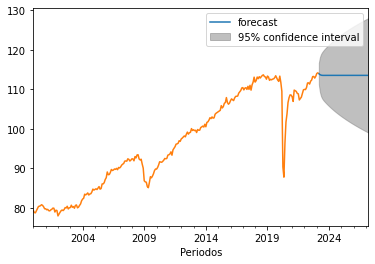

In [50]:
# librería para la gráfica del pronóstico
from statsmodels.graphics.tsaplots import plot_predict

# gráfica
plot_predict(resultado3, start='2023-03-01', end='2027-03-01')
igae['IGAE'].plot();

In [52]:
resultado3.predict('2023-03-01', '2024-10-01')

2023-03-01    113.940583
2023-04-01    113.718561
2023-05-01    113.584649
2023-06-01    113.525095
2023-07-01    113.506177
2023-08-01    113.503829
2023-09-01    113.506017
2023-10-01    113.508276
2023-11-01    113.509615
2023-12-01    113.510203
2024-01-01    113.510385
2024-02-01    113.510405
2024-03-01    113.510382
2024-04-01    113.510359
2024-05-01    113.510346
2024-06-01    113.510340
2024-07-01    113.510338
2024-08-01    113.510338
2024-09-01    113.510338
2024-10-01    113.510339
Freq: MS, Name: predicted_mean, dtype: float64